In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("spotify_dataset.csv")
df.head()


,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


In [3]:
unique_artists = df['Artist'].nunique()
print("Unique artists:", unique_artists)

Unique artists: 716


In [4]:
df['Popularity'].describe()

,Popularity
count,1556
unique,70
top,75
freq,67


In [5]:
top_artists = df['Artist'].value_counts().head(10)
print(top_artists)

Artist
Taylor Swift     52
Justin Bieber    32
Lil Uzi Vert     32
Juice WRLD       30
Pop Smoke        29
BTS              29
Bad Bunny        28
Eminem           22
The Weeknd       21
Ariana Grande    20
Name: count, dtype: int64


In [6]:
top_genres = df['Genre'].value_counts().head(10)
print(top_genres)

Genre
[]                                                75
['dance pop', 'pop', 'post-teen pop']             71
['latin', 'reggaeton', 'trap latino']             63
['pop', 'post-teen pop']                          57
['melodic rap', 'philly rap', 'rap', 'trap']      33
['chicago rap', 'melodic rap']                    32
['canadian pop', 'pop', 'post-teen pop']          32
['brooklyn drill']                                30
['k-pop', 'k-pop boy group']                      30
['latin', 'reggaeton', 'reggaeton colombiano']    29
Name: count, dtype: int64


In [7]:
df['Duration (ms)'] = pd.to_numeric(df['Duration (ms)'], errors='coerce')
avg_duration = df['Duration (ms)'].mean() / 60000
print("Average song duration (minutes):", avg_duration)

Average song duration (minutes): 3.299013613807983


In [8]:
for col in ['Danceability', 'Energy', 'Valence']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.groupby('Genre')[['Danceability', 'Energy', 'Valence']].mean().sort_values('Danceability', ascending=False)

,Danceability,Energy,Valence
Genre,,,
['trap queen'],0.956,0.502,0.795
"['funk carioca', 'funk pop']",0.935,0.710,0.635
"['basshall', 'turkish trap']",0.933,0.448,0.737
"['dance pop', 'latin', 'latin pop', 'latin viral pop', 'pop', 'rap latina', 'reggaeton', 'trap latino']",0.930,0.837,0.821
['new wave pop'],0.917,0.588,0.828
...,...,...,...
"['adult standards', 'lounge', 'soul', 'vocal jazz']",0.319,0.210,0.209
"['indie poptimism', 'pop']",0.316,0.630,0.313
"['celtic', 'celtic punk', 'celtic rock', 'folk punk', 'irish folk', 'punk']",0.271,0.551,0.428


In [9]:
print(df.columns)

Index(['Index', 'Highest Charting Position', 'Number of Times Charted',
       'Week of Highest Charting', 'Song Name', 'Streams', 'Artist',
       'Artist Followers', 'Song ID', 'Genre', 'Release Date', 'Weeks Charted',
       'Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness',
       'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence',
       'Chord'],
      dtype='object')


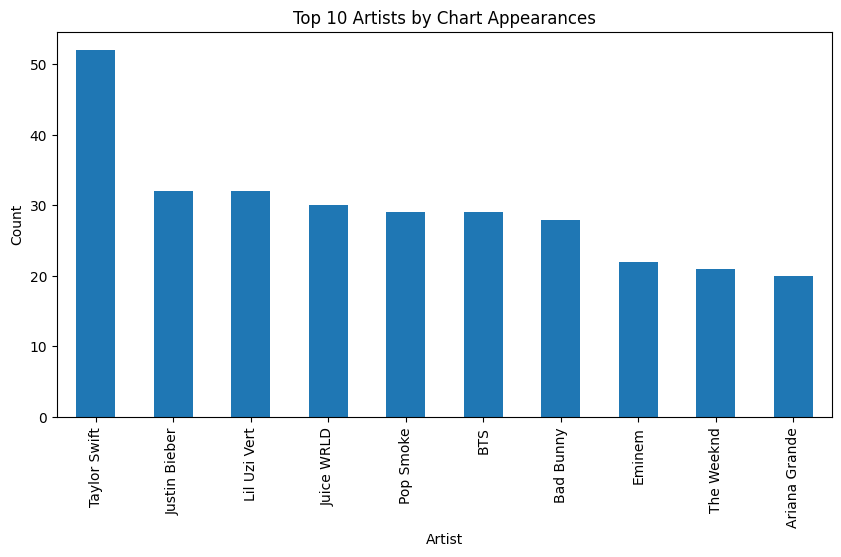

In [10]:
plt.figure(figsize=(10,5))
top_artists.plot(kind='bar')
plt.title("Top 10 Artists by Chart Appearances")
plt.ylabel("Count")
plt.show()

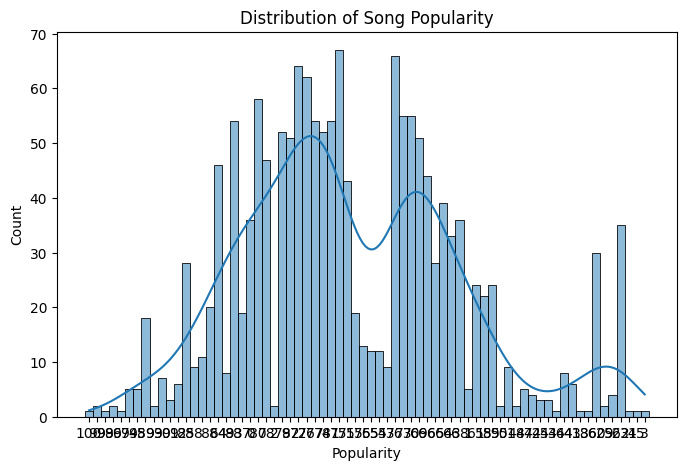

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(df['Popularity'], bins=20, kde=True)
plt.title("Distribution of Song Popularity")
plt.show()

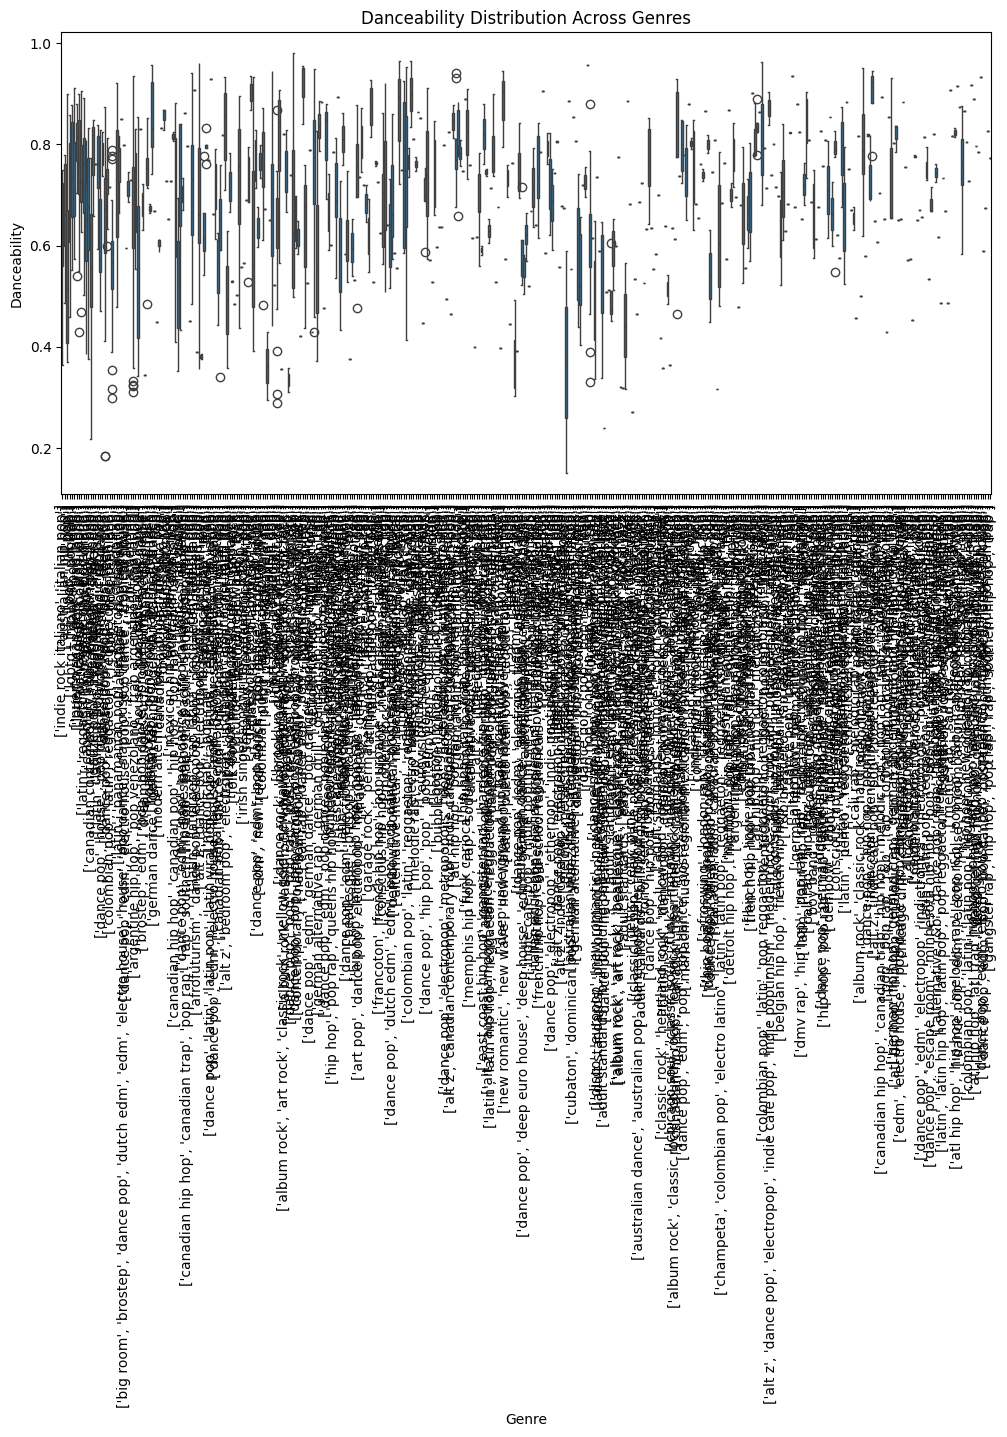

In [12]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Genre', y='Danceability', data=df)
plt.xticks(rotation=90)
plt.title("Danceability Distribution Across Genres")
plt.show()

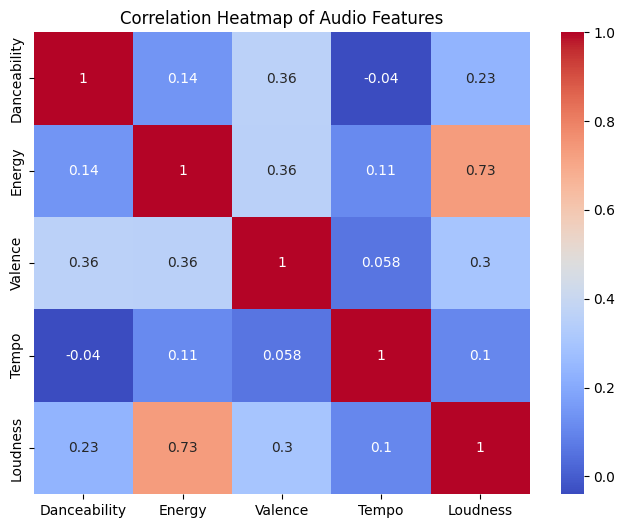

In [13]:
features = ['Danceability', 'Energy', 'Valence', 'Tempo', 'Loudness']
for col in features:
    df[col] = pd.to_numeric(df[col], errors='coerce')

plt.figure(figsize=(8,6))
sns.heatmap(df[features].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Audio Features")
plt.show()

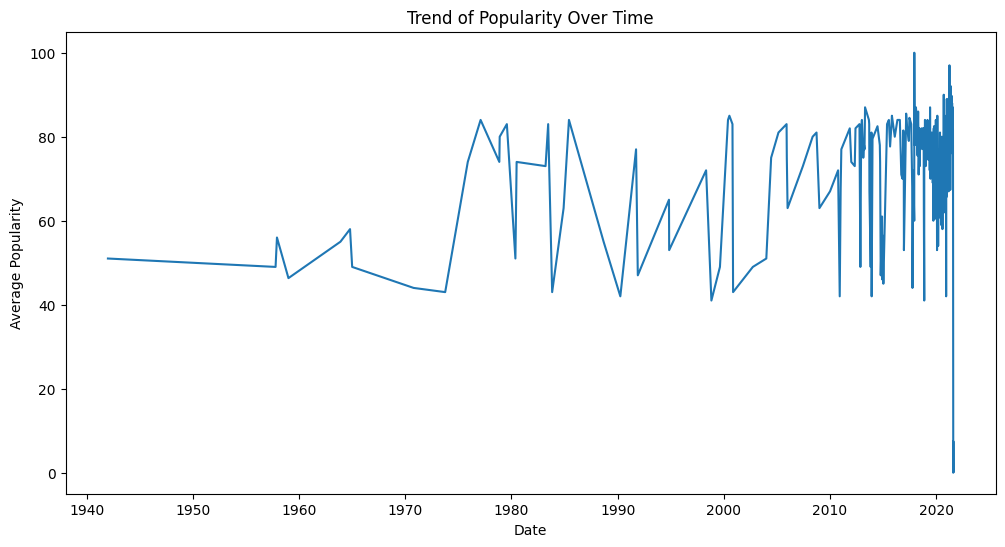

In [14]:
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')
df['Popularity'] = pd.to_numeric(df['Popularity'], errors='coerce')
popularity_trend = df.groupby('Release Date')['Popularity'].mean()

plt.figure(figsize=(12,6))
plt.plot(popularity_trend.index, popularity_trend.values)
plt.title("Trend of Popularity Over Time")
plt.xlabel("Date")
plt.ylabel("Average Popularity")
plt.show()

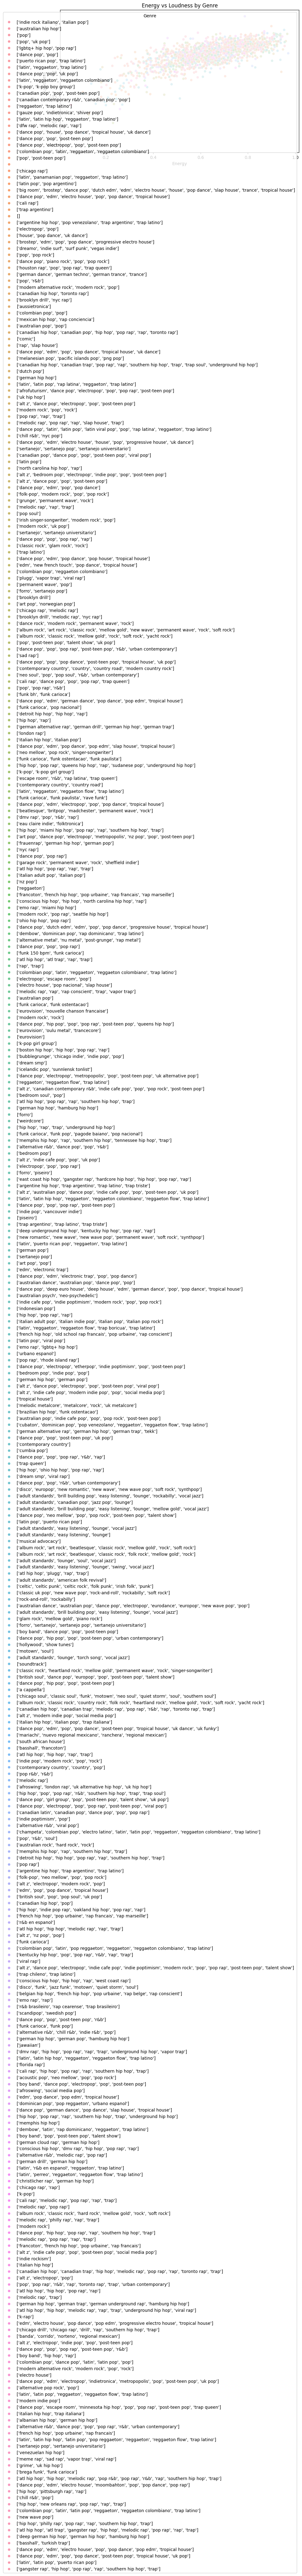

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Energy', y='Loudness', hue='Genre', data=df, alpha=0.7)
plt.title("Energy vs Loudness by Genre")
plt.show()